# Kaggle Skin Cancer MNIST

## 파일 업로드

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
#os.environ을 이용하여 Kaggle API 세팅
os.environ['KAGGLE_USERNAME'] = 'junseokee'
os.environ['KAGGLE_KEY'] = '700d85d8d7f11484367ea21d45aa2bee'

In [ ]:
# 데이터 다운로드 하는 명령
import zipfile
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip '*.zip'

### 파일당 데이터 갯수 확인

In [31]:

base_dir = '/content/'
train_dir1 = os.path.join(base_dir, 'HAM10000_images_part_1')
train_dir2 = os.path.join(base_dir, 'HAM10000_images_part_2')
train_dir3 = os.path.join(base_dir, 'ham10000_images_part_1')
train_dir4 = os.path.join(base_dir, 'ham10000_images_part_2')

In [32]:
train_fnames1 = os.listdir(train_dir1)
train_fnames2 = os.listdir(train_dir2)
train_fnames3 = os.listdir(train_dir3)
train_fnames4 = os.listdir(train_dir4)

In [33]:
print(len(train_fnames1))
print(len(train_fnames2))
print(len(train_fnames3))
print(len(train_fnames4))

5000
5015
5000
5015


In [16]:
df = pd.read_csv('/content/HAM10000_metadata.csv')

In [23]:
df['dx'].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

## 데이터와 라벨 분리

In [8]:
data_dir = '/content/hmnist_28_28_RGB.csv'
data_df = pd.read_csv(data_dir)

In [9]:
Label = data_df['label']
Data = data_df.drop(columns=['label'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


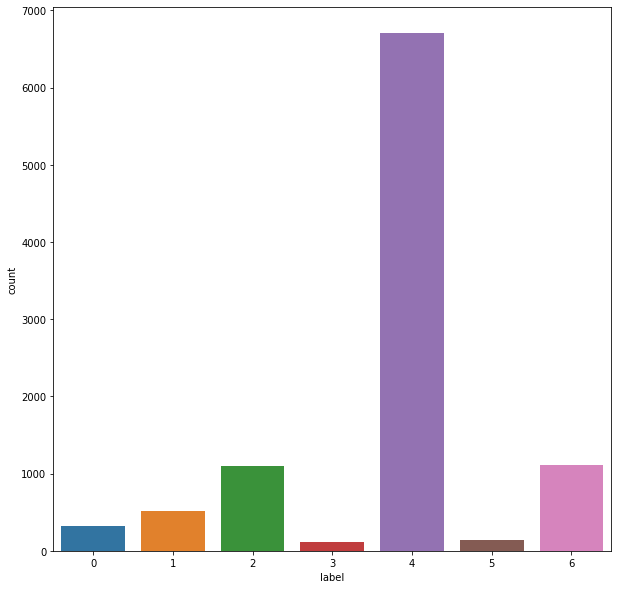

In [10]:
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(Label)

In [11]:
print(Data.shape,"\n",Label.shape)

(10015, 2352) 
 (10015,)


In [61]:
data = np.array(Data).reshape(-1,28,28,3)
label = np.array(Label).reshape(-1,)
print(data.shape, label.shape)

(10015, 28, 28, 3) (10015,)


[4]


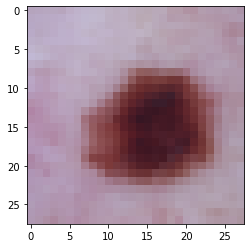

In [43]:
plt.imshow(data[8000])
print(label[8000])

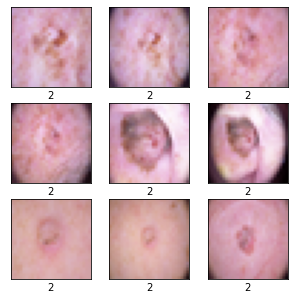

In [37]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(333)

class_names = ['0','1','2','3','4','5','6']
sample_size = 9
random_idx = np.random.randint(10015, size=sample_size)
plt.figure(figsize = (5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(data[i])
  plt.xlabel(class_names[int(label[i])])
plt.show()

In [97]:
# Train Test 데이터셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, label,
                                                    test_size=0.2, random_state=333)

In [98]:
print(f'x_train.shape: {x_train.shape}, x_test.shape : {x_test.shape}')
print(f'y_train.shape: {y_train.shape}, y_test.shape : {y_test.shape}')

x_train.shape: (8012, 28, 28, 3), x_test.shape : (2003, 28, 28, 3)
y_train.shape: (8012,), y_test.shape : (2003,)


In [99]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [100]:
datagenerator = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgenerator = ImageDataGenerator(rescale=(1./255))

In [89]:
print(f'x_train.shape: {x_train.shape}, x_val.shape : {x_val.shape}')
print(f'y_train.shape: {y_train.shape}, y_val.shape : {y_val.shape}')

x_train.shape: (5608, 28, 28, 3), x_val.shape : (2404, 28, 28, 3)
y_train.shape: (5608,), y_val.shape : (2404,)


In [90]:
# 펴균과 표준편차는 채널별로 구해줍니다.
x_mean = np.mean(x_train, axis = (0, 1, 2))
x_std = np.std(x_train, axis = (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [91]:
print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(5608, 28, 28, 3) 5608
(2404, 28, 28, 3) 2404


In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu', input_shape = (28, 28, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))


model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(7, activation = 'softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [104]:
history = model.fit(x_train, y_train,
                    epochs = 100,
                    batch_size = 128,
                    validation_split=0.3,
                    shuffle = True
                    )

Epoch 1/100


InvalidArgumentError: ignored

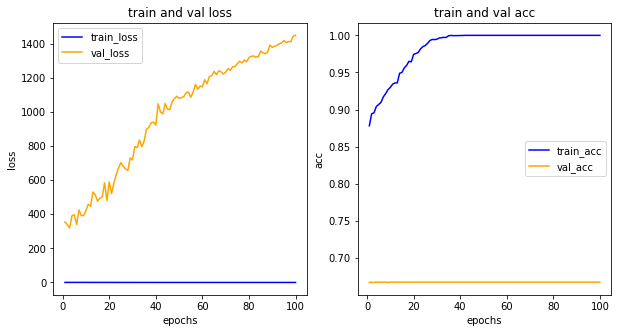

In [96]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize = (10,5))
# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss , color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

In [105]:
def prepare_for_train_test(X, Y):
    # Splitting into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    
    # Prepare data for training and testing the model
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 10,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  fill_mode = 'nearest')
    train_datagen.fit(X_train)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_datagen.fit(X_test)
    return X_train, X_test, Y_train, Y_test

In [108]:
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = prepare_for_train_test(data, label)

In [106]:
def create_model():
    model = Sequential()
    model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
    model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(7, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
    print(model.summary())
    return model;

In [109]:
model = create_model

In [107]:
def train_model(model, X_train, Y_train, EPOCHS=25):
    early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, 
                           mode='auto')
                               #, restore_best_weights=True)
    
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, 
                              verbose=1, mode='auto')
    
    history = model.fit(X_train,
                        Y_train,
                        validation_split=0.2,
                        batch_size = 64,
                        epochs = EPOCHS,
                        callbacks = [reduce_lr, early_stop])
    return history

In [110]:
model2_history = train_model(model, X_train_aug, Y_train_aug, 50)

NameError: ignored